In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/IMDB Dataset.csv',engine="python",error_bad_lines=False)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


**Text normalization**

In [5]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Removing special characters**

In [6]:
#function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#function on review column
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [7]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'most', 'if', 'other', 'ours', 'i', 'against', 'of', 'ain', 'about', 'own', "weren't", "couldn't", 'how', 'because', 'will', "isn't", 'll', 'were', 'both', 'he', 'your', 'hadn', 'who', 'o', 'just', 'm', 'this', 'during', 'as', 'from', 'yourselves', "should've", 'isn', 'is', 'yours', 'what', 'for', 'where', 'and', 'mightn', 'through', 'my', 'now', 'y', 'when', 'it', 'before', 'in', 'some', 'but', 'that', "don't", 'wasn', 'weren', 'very', 'they', 'having', 'again', 'only', 'ma', 'haven', "that'll", 'once', "aren't", "mightn't", 'into', 'didn', 'an', 't', "you'll", 'whom', 'yourself', 'shan', 'myself', 'itself', 'their', 'up', "shouldn't", 'then', 'can', 'by', 'which', 'these', "wouldn't", 'theirs', 'its', 've', "it's", 'me', 'hers', 'no', 'himself', 'more', 'such', "won't", "didn't", "needn't", "hadn't", 'further', 'am', 'too', 'being', 'aren', 'each', 'doesn', 'with', 'had', 'so', 'nor', "shan't", 'have', 'doing', 'above', 'off', 'couldn', 'wouldn', 'should', "hasn't", 'on', 'below', '

In [8]:
#Count vectorizer for bag of words
y=np.array(df.sentiment.values)
cv=CountVectorizer(max_features=1000)
#transformed train reviews
x=cv.fit_transform(df.review).toarray()
print(x.shape,y.shape)


(50000, 1000) (50000,)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=123)
print(xtrain.shape,xtest.shape, ytrain.shape,ytest.shape)

(35000, 1000) (15000, 1000) (35000,) (15000,)


In [10]:
word_frequency = pd.Series(' '.join(df['review']).split()).value_counts()
print(word_frequency)

movie                82310
film                 73514
one                  46301
like                 37483
good                 27403
                     ...  
Texture                  1
cinema10                 1
ICET                     1
deathMany                1
differentWatching        1
Length: 256143, dtype: int64


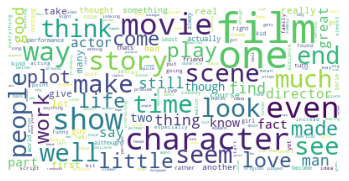

In [11]:
from PIL import Image
from wordcloud import WordCloud
corpus = list(df['review'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**SVM** **technique**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
sv=SVC()                                    #SupportVectorClassifier
rf=RandomForestClassifier()                 #RandomForestClassifier


In [13]:

rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [14]:
predict_rf=rf.predict(xtest)
#predict_mn=mn.predict(xtest)

In [15]:
rf_score=accuracy_score(ytest,predict_rf)
print("svm_score :",rf_score)
print("--Accuracy-->", accuracy_score(ytest,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(ytest,predict_rf))
    

svm_score : 0.8303333333333334
--Accuracy--> 0.8303333333333334
--ConfuMat-->
 
 [[6222 1247]
 [1298 6233]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.83      0.83      0.83      7469
    positive       0.83      0.83      0.83      7531

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [16]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=29)
print(x_train.shape,x_test.shape, y_train.shape,ytest.shape)

(35000, 1000) (15000, 1000) (35000,) (15000,)


In [18]:
                              
rf=RandomForestClassifier()                 #RandomForestClassifier

rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("svm_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))


svm_score : 0.826
--Accuracy--> 0.826
--ConfuMat-->
 
 [[6191 1334]
 [1276 6199]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.83      0.82      0.83      7525
    positive       0.82      0.83      0.83      7475

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [19]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(35000, 1000) (15000, 1000) (35000,) (15000,)


In [20]:
                             
rf=RandomForestClassifier()                 #RandomForestClassifier

rf.fit(x_train, y_train)
predict_rf=rf.predict(x_test)
rf_score=accuracy_score(y_test,predict_rf)
print("svm_score :",rf_score)
print("--Accuracy-->", accuracy_score(y_test,predict_rf))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,predict_rf))
print("\n--ClassRep-->\n","\n", classification_report(y_test,predict_rf))

svm_score : 0.8282
--Accuracy--> 0.8282
--ConfuMat-->
 
 [[6222 1299]
 [1278 6201]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.83      0.83      0.83      7521
    positive       0.83      0.83      0.83      7479

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



**Linear regression Modelling the dataset**

In [21]:
#training the model

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42,solver='lbfgs')
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
print(lr_bow)


LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic regression model performane on test dataset**

In [22]:
#Predicting the model for bag of words
lr_predict=lr.predict(xtest)
print(lr_predict)


['negative' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [23]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)


lr_bow_score : 0.8560666666666666


In [24]:
#Classification report for bag of words 
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

--Accuracy--> 0.8560666666666666
--ConfuMat-->
 
 [[6311 1158]
 [1001 6530]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85      7469
    positive       0.85      0.87      0.86      7531

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [36]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,random_state=29,C=1,solver='lbfgs')
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))


lr_bow_score : 0.8560666666666666
--Accuracy--> 0.8560666666666666
--ConfuMat-->
 
 [[6311 1158]
 [1001 6530]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85      7469
    positive       0.85      0.87      0.86      7531

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [37]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=200,random_state=129)
#Fitting the model for Bag of words
lr_bow=lr.fit(xtrain,ytrain)
lr_bow_score=accuracy_score(ytest,lr_predict)
print("lr_bow_score :",lr_bow_score)
print("--Accuracy-->", accuracy_score(ytest,lr_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,lr_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,lr_predict))

lr_bow_score : 0.8560666666666666
--Accuracy--> 0.8560666666666666
--ConfuMat-->
 
 [[6311 1158]
 [1001 6530]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85      7469
    positive       0.85      0.87      0.86      7531

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



**Multinomial Naive Bayes for bag of words and tfidf features**

In [38]:
#training the model
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(xtrain,ytrain)
print(Nb_bow)


MultinomialNB()


In [39]:
#Predicting the model for bag of words
nb_predict=Nb.predict(xtest)
print(nb_predict)

['negative' 'positive' 'positive' ... 'positive' 'positive' 'negative']


In [40]:
#Accuracy score for bag of words
nb_score=accuracy_score(ytest,nb_predict)
print("nb_score :",nb_score)

nb_score : 0.8278


In [41]:
print("--Accuracy-->", accuracy_score(ytest,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(ytest,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(ytest,nb_predict))

--Accuracy--> 0.8278
--ConfuMat-->
 
 [[6133 1336]
 [1247 6284]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.83      0.82      0.83      7469
    positive       0.82      0.83      0.83      7531

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [44]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))


(35000, 1000) (15000, 1000) (35000,) (15000,)
nb_score : 0.8294666666666667
--Accuracy--> 0.8294666666666667
--ConfuMat-->
 
 [[6177 1344]
 [1214 6265]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.82      0.83      7521
    positive       0.82      0.84      0.83      7479

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [45]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=129)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))

(35000, 1000) (15000, 1000) (35000,) (15000,)
nb_score : 0.8311333333333333
--Accuracy--> 0.8311333333333333
--ConfuMat-->
 
 [[6282 1321]
 [1212 6185]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.84      0.83      0.83      7603
    positive       0.82      0.84      0.83      7397

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [47]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=49)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))


nb_score : 0.8302666666666667
--Accuracy--> 0.8302666666666667
--ConfuMat-->
 
 [[6123 1315]
 [1231 6331]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.83      0.82      0.83      7438
    positive       0.83      0.84      0.83      7562

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [48]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=89)
Nb=MultinomialNB()
#fitting the svm for bag of words
Nb_bow=Nb.fit(x_train,y_train)
nb_predict=Nb.predict(x_test)
nb_score=accuracy_score(y_test,nb_predict)
print("nb_score :",nb_score)
print("--Accuracy-->", accuracy_score(y_test,nb_predict))
print("--ConfuMat-->\n","\n",confusion_matrix(y_test,nb_predict))
print("\n--ClassRep-->\n","\n", classification_report(y_test,nb_predict))

nb_score : 0.8281333333333334
--Accuracy--> 0.8281333333333334
--ConfuMat-->
 
 [[6094 1322]
 [1256 6328]]

--ClassRep-->
 
               precision    recall  f1-score   support

    negative       0.83      0.82      0.83      7416
    positive       0.83      0.83      0.83      7584

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [49]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['score']= df['review'].apply(lambda review: analyser.polarity_scores(review))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
#df.drop_duplicates(subset =”review”, keep = “first”, inplace = True)
df['review'] = df['review'].astype('str')
def get_polarity(text):
  
  return TextBlob(text).sentiment.polarity
df['Polarity'] = df['review'].apply(get_polarity)

In [51]:

df['compound'] = df['score'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df.head()
df.drop(['score'],axis=1)

,review,sentiment,Polarity,compound,sentiment_type
0,One reviewers mentioned watching 1 Oz episode ...,positive,0.025587,-0.9945,NEGATIVE
1,wonderful little production filming technique ...,positive,0.127604,0.9582,POSITIVE
2,thought wonderful way spend time hot summer we...,positive,0.264732,0.9520,POSITIVE
3,Basically theres family little boy Jake thinks...,negative,-0.060937,-0.9117,NEGATIVE
4,Petter Matteis Love Time Money visually stunni...,positive,0.239534,0.9871,POSITIVE
...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,0.402591,0.9762,POSITIVE
49996,Bad plot bad dialogue bad acting idiotic direc...,negative,-0.322222,-0.9320,NEGATIVE
49997,Catholic taught parochial elementary schools n...,negative,0.056984,-0.9074,NEGATIVE
49998,Im going disagree previous comment side Maltin...,negative,-0.042725,-0.5267,NEGATIVE


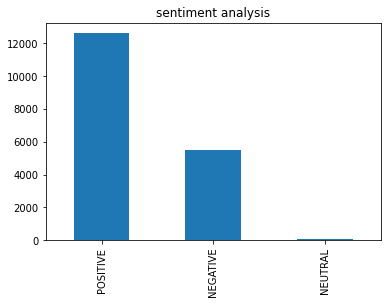

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")